# Data Science Challenge

In [1]:
# To install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

- [Part A](#Part_A)
 1. [Data Cleaning](#Part_A1)
 2. [Converting Target Variable](#Part_A2)
 3. [Visualizaiton](#Part_A3)
   - [Class Imbalance](#Part_A300)
   - [EDA analysis of continuous variables](#Part_A310)
   - [EDA analysis of categorical variables](#Part_A311)
 

- [Part B](#Part_B)

 1. [Data preprocessing](#Part_B1)
 2. [Model building](#Part_B2)
 3. [Parameter Tuning](#Part_B3)
 
 
- [Part C](#Part_C)
 1. [Best Parameters and Product opportunities](#Part_C1)

- [Part D](#Part_D)
 1. [Out of Sample Predictions](#Part_D1)

- [Part E](#Part_E)
 1. [# Possible Improvements](#Part_E1)




# Part A  <a id='Part_A'></a>

In [117]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels import robust

from warnings import filterwarnings
from sklearn.metrics import roc_auc_score

pd.set_option('display.float_format', lambda num:'%1.3f'%num)
pd.set_option('display.max_columns', 99)
filterwarnings('ignore')

# Data Description

Feature | Description
:---|:---
UniqueId |The unique id of a customer.
SocialMedia |The number of different social media webpages visited during the session.
SocialMediaTime |The seconds spent visiting social media web pages.
News|The number of different news( eg. CNN) webpages visited by the prospective customer during the session.
NewsTime|The seconds spent visiting web pages providing news service. 
Blogs|The number Blog web pages visited during the session.
BlogsTime| The seconds spent visiting Blogs web pages.
BounceRate| The percentage of visitors  leaving the page without triggering any other requests during the session.
ExitRate| The value of all pageviews to the page, the percentage that was the last in the session. 
PageValue|The average value for a web page that a user visited before completing an e-commerce transaction
TrafficKind| Web Administration terminology. Categorical feature describing the kind of traffic the website received. 
OS|Categorical feature describing the operating system of the platform connected to the session.
Browser|Categorical feature describing the browser that connected to the session.
Month|It can be handled as discrete or categorical. The month of the connection.
Region|Categorical geographical feature describing the USA region from where the session is initiated.
VisitorKind|This categorical variable describes the kind of visitor.
DayImportance|The closeness of the visit time to a special day (e.g. Mother’s Day, Valentine's Day) 
IsWeekend|Whether it is a weekend or not.
IsSale|Whether this is a transaction or not. This is the Response Variable.

# Data Wrangling & Visualization 




For the sake of time perform EDA only on the following variables - SocialMediaTime, BlogsTime, VisitorKind, OS and IsSale 

Visualize the distribution of independent variables and their relationship to the target variable (IsSale). Try to comment as much as possible to explain your thought process and any key takwaways from the EDA. 
If there exists any data issues feel free to do any necessary preprocessing or explain what could be done if this was a real project and you had more time on hand.

In [5]:
train_data = pd.read_csv("train.csv", index_col=0)

In [6]:
train_data.head()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
UniqueId,,,,,,,,,,,,,,,,,,
000x41,3.000,87.833,0.000,0.000,27.000,798.333,0.000,0.013,22.916,search,windows,Google-Chrome,Feb,East North Central,Returning,0.800,0.000,True
000x4c,10.000,1005.667,0.000,0.000,36.000,2111.342,0.004,0.014,11.439,direct,windows,Other,Feb,New England,Returning,0.000,0.000,True
000x65,4.000,61.000,0.000,0.000,19.000,607.000,0.000,0.027,17.536,referral,android,Safari,Feb,West South Central,Returning,1.000,1.000,True
000xc6,0.000,0.000,0.000,0.000,17.000,840.233,0.000,0.002,109.176,direct,windows,Google-Chrome,Mar,Pacific,New,0.000,0.000,True
000xc7,3.000,94.000,2.000,125.000,55.000,1970.845,0.000,0.002,96.255,direct,windows,Firefox,Mar,New England,New,0.000,1.000,True


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2821 entries, 000x41 to 0x1d70
Data columns (total 18 columns):
SocialMedia        2821 non-null float64
SocialMediaTime    2821 non-null float64
News               2821 non-null float64
NewsTime           2821 non-null float64
Blogs              2821 non-null float64
BlogsTime          2821 non-null float64
BounceRate         2821 non-null float64
ExitRate           2821 non-null float64
PageValue          2821 non-null float64
TrafficKind        2821 non-null object
OS                 2821 non-null object
Browser            2821 non-null object
Month              2821 non-null object
Region             2821 non-null object
VisitorKind        2821 non-null object
DayImportance      2821 non-null float64
IsWeekend          2821 non-null float64
IsSale             2821 non-null int64
dtypes: float64(11), int64(1), object(6)
memory usage: 498.7+ KB


In [35]:
#Explore columns
train_data.dtypes

SocialMedia        float64
SocialMediaTime    float64
News               float64
NewsTime           float64
Blogs              float64
BlogsTime          float64
BounceRate         float64
ExitRate           float64
PageValue          float64
TrafficKind         object
OS                  object
Browser             object
Month               object
Region              object
VisitorKind         object
DayImportance      float64
IsWeekend          float64
IsSale               int64
dtype: object

In [8]:
#Description
train_data.describe()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,DayImportance,IsWeekend
count,2900.000,2889.000,2892.000,2898.000,2893.000,2901.000,2891.000,2892.000,2891.000,2893.000,2896.000
mean,2.694,94.281,0.607,41.423,37.617,69062.541,0.016,0.034,14.110,0.045,0.261
std,3.566,184.294,1.326,144.907,50.334,2628346.866,0.039,0.041,27.794,0.173,0.439
min,-20.000,0.000,0.000,-1001.000,0.000,-2000056.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,10.000,284.700,0.000,0.012,0.000,0.000,0.000
50%,1.000,27.000,0.000,0.000,22.000,794.993,0.001,0.021,0.000,0.000,0.000
75%,4.000,115.000,1.000,0.000,44.000,1758.250,0.012,0.038,17.829,0.000,1.000
max,27.000,2720.500,12.000,1767.667,584.000,100099000.000,0.200,0.200,360.953,1.000,1.000


In [9]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SocialMedia,2900.000,2.694,3.566,-20.000,0.000,1.000,4.000,27.000
SocialMediaTime,2889.000,94.281,184.294,0.000,0.000,27.000,115.000,2720.500
News,2892.000,0.607,1.326,0.000,0.000,0.000,1.000,12.000
NewsTime,2898.000,41.423,144.907,-1001.000,0.000,0.000,0.000,1767.667
Blogs,2893.000,37.617,50.334,0.000,10.000,22.000,44.000,584.000
BlogsTime,2901.000,69062.541,2628346.866,-2000056.000,284.700,794.993,1758.250,100099000.000
BounceRate,2891.000,0.016,0.039,0.000,0.000,0.001,0.012,0.200
ExitRate,2892.000,0.034,0.041,0.000,0.012,0.021,0.038,0.200
PageValue,2891.000,14.110,27.794,0.000,0.000,0.000,17.829,360.953
DayImportance,2893.000,0.045,0.173,0.000,0.000,0.000,0.000,1.000


In [10]:
train_data.describe(exclude=[np.number]).transpose()

,count,unique,top,freq
TrafficKind,2889,4,direct,1172
OS,2896,5,windows,1574
Browser,2891,5,Google-Chrome,1836
Month,2898,10,Nov,873
Region,2894,9,New England,1120
VisitorKind,2893,3,Returning,2379
IsSale,2908,2,False,1497


We see that the counts of each variable are different so there must be missing values.

#### 1. Data Cleaning  <a id='Part_A1'></a>

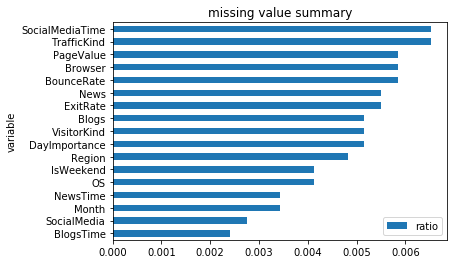

In [11]:
missing_values=train_data.isna().sum()
missing_values=pd.DataFrame({'variable':missing_values.index,'count':missing_values.values})
missing_values['ratio']=missing_values['count']/train_data.shape[0]

missing_values[missing_values['count']>0].sort_values(by=['ratio']).plot(kind='barh',
              x='variable',y='ratio',title='missing value summary',sort_columns=True)

Variable that's missing the highest no of data points is Social Media time and Traffic Kind. At Max data missing is only 0.6%. We will have 99.4% of the data to work after removing all Null value. Which is a good size data to Model



In [13]:
train_data = train_data.dropna()

#### 2. Converting Target Variable  <a id='Part_A2'></a>

In [16]:
train_data['IsSale'] =np.where(train_data['IsSale']  == True, 1,0)

In [18]:
train_data['IsSale'].tail()

UniqueId
0x2371    0
0x2a08    0
0x17ee    0
0x2e34    0
0x1d70    0
Name: IsSale, dtype: int64

#### 3. Visualization  <a id='Part_A3'></a>

### Visualization Continous Variable <a id='Part_A310'></a>

In [61]:
class Exploratory_Data_analysis:
    dep_variable = "IsSale"
    def __init__(self,data):
        # Load the data
        self.data = data
        self.No_of_Data_points()
    def No_of_Data_points(self):
        x= list(self.data.shape)
        return (x)
    def column_names(self):
        x= list(self.data.columns)
        return (x)
    def data_points_class(self):
        unique_class = list(self.data[self.dep_variable].unique())
        x= list(self.data[self.dep_variable].value_counts())
        for i,j in zip(range(0,len(unique_class)),range(0,len(x))):
            print(self.dep_variable + "->{}, No of data Points->{}".format(unique_class[i],x[j]))
        for i in range (0,len(x)):
            class_balance = (x[i]/len(self.data))* 100
            if (class_balance >= 90) and (class_balance <= 10):
                print("Class is Imbalance, Majority class will dominate predictions")
                break;
            if (class_balance >= 40) and (class_balance <= 60):
                print("Class is Balanced")
                #print (x[0]/len(self.data))* 100
                break;
            else:
                print("Class is okay balance")
                #print (int(x[0])/len(self.data))* 100
                break;
                
    def pair_plot(self):
        sns.set_style("whitegrid");
        sns.pairplot(self.data, hue = self.dep_variable, height= 4,vars=['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate'])
        
        plt.show()
        
    def hist_plot(self):
        All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        #print(All_columns)
        for i in range (0,len(All_columns)):
            sns.FacetGrid(self.data, hue=self.dep_variable, height=6) \
    .map(sns.distplot, All_columns[i], kde=True) \
    .add_legend()
            plt.ylabel('Frequency')
            plt.title('Histogram of ' + All_columns[i] + ' of different ' + self.dep_variable )
            
    def pdf_plots(self):
        # Reference on subplots https://www.youtube.com/watch?v=4DnWYK88-E4
        All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        res=[]
        for i in All_columns:
            for j in class_varaible_list:
                res.append((i,j))
        res = list(enumerate(res))
        #print(res)
        plt.figure(figsize=(15,15))
        for i in res:
            #print(i)
            #print(i[1][0])
            plt.subplot(3,2,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            df0=self.data[self.data[self.dep_variable]==i[1][1]]
            counts, bin_edges = np.histogram(df0[i[1][0]], bins=10, density = True)

            #print(c)
            #print(i[1][0])
            #print (counts)
            #print(bin_edges)
            pdf = counts/(sum(counts))
            cdf = np.cumsum(pdf)
            #ax = fig.add_subplot(6,2,num)

            plt.plot(bin_edges[1:],pdf, 'r-')
            plt.plot(bin_edges[1:],cdf, 'b-')
            plt.title(self.dep_variable +'->'+ str(i[1][1]))
            plt.xlabel(i[1][0])
            plt.ylabel('Probability')
    def Statistics_Mean_Std(self):
        unique_class = list(self.data[self.dep_variable].unique())
        unique_class_list = []
        Measure_List = ['Mean','Stand_Dev']
        for i in unique_class:
            for j in Measure_List:
                unique_class_list.append(self.dep_variable + str(i)+'_'+ j)
        dx = pd.DataFrame( columns = unique_class_list)
        All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        for i in All_columns:
            res=[]
            for j in class_varaible_list:
                df0=self.data[self.data[self.dep_variable]==j]
                Mean_Var = np.mean(df0[i])
                res.append(Mean_Var)
                std_Var =  np.std(df0[i])
                res.append(std_Var)
            df2 = pd.DataFrame ([res],columns = unique_class_list, index=[i] )
            dx = dx.append(df2)
        return dx
    
    def Statistics_Median_Percentile_Quantile_IQR_MAD(self):
        unique_class = list(self.data[self.dep_variable].unique())
        unique_class_list = []
        Measure_List = ['Median','0_Quantile','25_Quantile', '50_Quantile','75_Quantile','90_Percentile',
                 'MAD' ]
        for i in unique_class:
            for j in Measure_List:
                unique_class_list.append(self.dep_variable + str(i)+'_'+ j)
        dx = pd.DataFrame( columns = unique_class_list)
        All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        for i in All_columns:
            res=[]
            perc = []
            for j in class_varaible_list:
                df0=self.data[self.data[self.dep_variable]==j]
                Median_Var = np.median(df0[i])
                res.append(str(Median_Var))
                Quantile = list(np.percentile(df0[i],np.arange(0, 100, 25)))
                res= res + Quantile
                ninety_perc = np.percentile(df0[i],90)
                res.append(str(ninety_perc))
                Mad = robust.mad(df0[i])
                res.append(Mad)
                
            df2 = pd.DataFrame ([res],columns = unique_class_list, index=[i] )
            dx = dx.append(df2)
        return dx
    def Box_Plot(self):
        
        All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        res = list(enumerate(All_columns))
        plt.figure(figsize=(15,15))
        for i in res:
            plt.subplot(5,1,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            sns.boxplot(x=self.dep_variable,y=i[1], data=y.data)
            plt.title(i[1] + ' distribution for different ' + self.dep_variable, fontdict=None, loc='center', pad=None)
            
    def violin_Plot(self):
        
        All_columns = ['SocialMediaTime', 'NewsTime', 'BlogsTime', 'BounceRate', 'ExitRate']
        #All_columns.remove(self.dep_variable)
        res = list(enumerate(All_columns))
        plt.figure(figsize=(15,15))
        for i in res:
            plt.subplot(3,1,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            sns.violinplot(x=self.dep_variable,y=i[1], data=y.data)
            plt.title(i[1] + ' distribution for different ' +self.dep_variable, fontdict=None, loc='center', pad=None)

In [62]:
EDA = Exploratory_Data_analysis(train_data)

### Class Imbalance <a id='Part_A300'></a>

In [44]:
data_points_class = EDA.data_points_class()

IsSale->1, No of data Points->1451
IsSale->0, No of data Points->1370
Class is Balanced


Class is Balanced. We don't need to do oversampling of minority or undersampling of majority class or change class weights

### Pair Plot

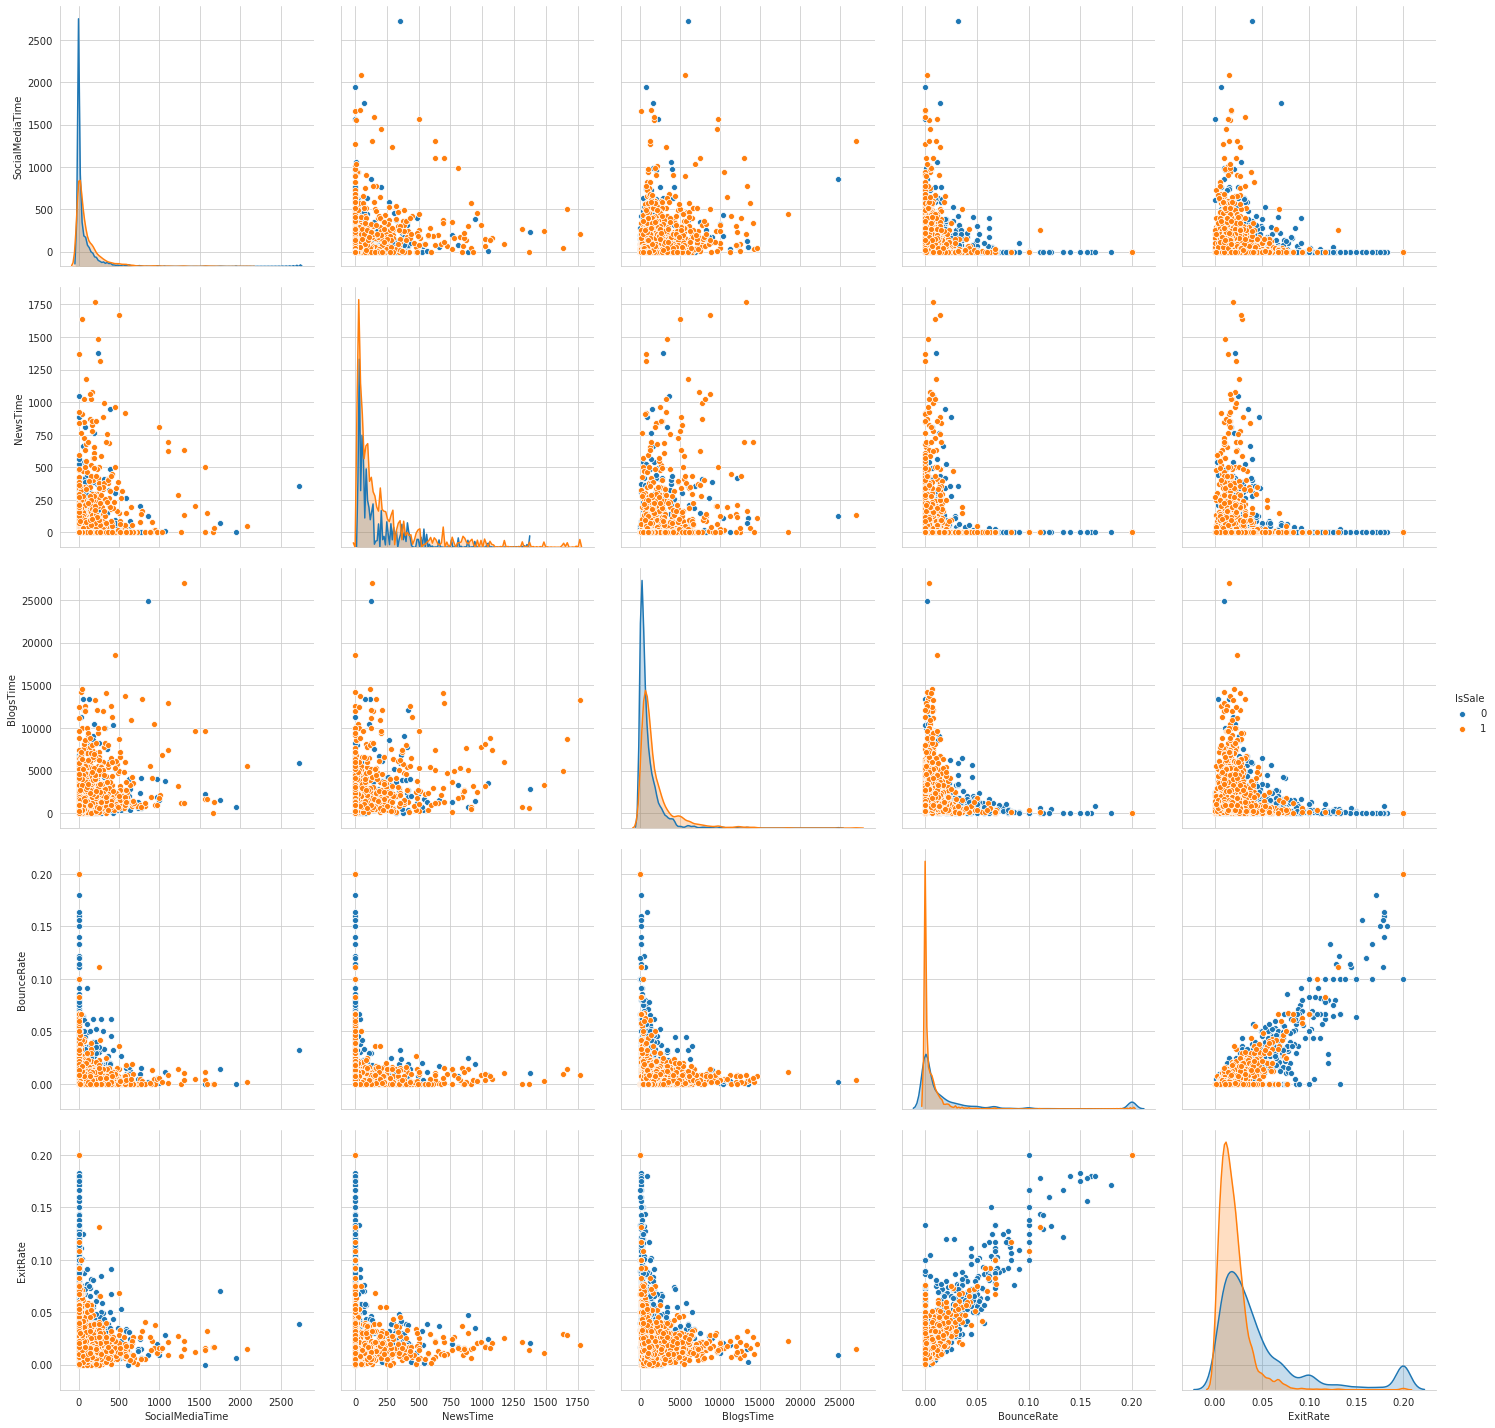

In [45]:
pair_plot = EDA.pair_plot()

<div class="alert alert-block alert-success"><b>Pair Plot Analysis:</b> 
Pair Plots helps to identify for what continuous variables the classes are distinguishable

<br/>

a) Bounce rate vs Exit rate - Clearly the lower the bounce rate -> higher the sales conversion <br/>
b) Higher the exit rate - less sales conversion <br/>
c) Other Variables for class distinction are mixed<br/>
</div>

### Histogram Plot

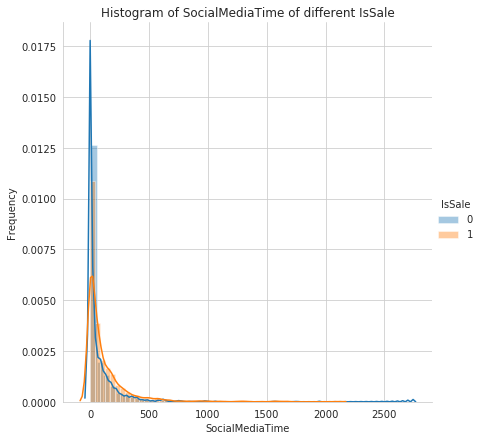

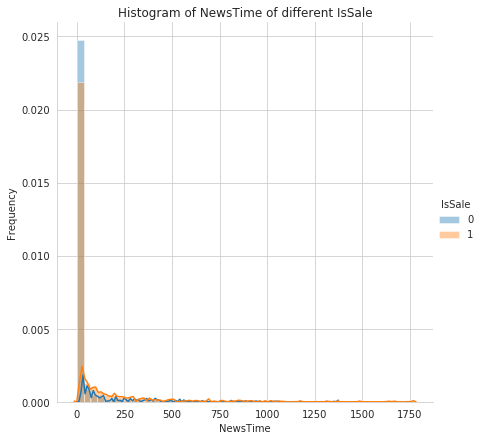

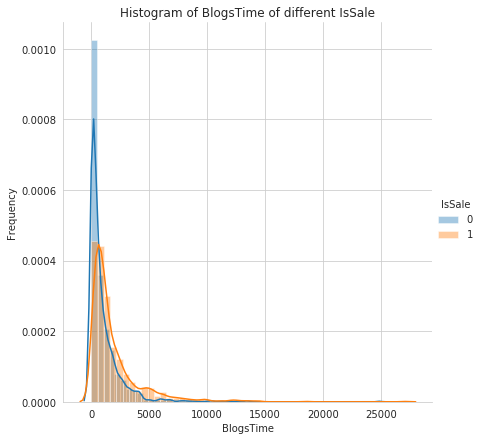

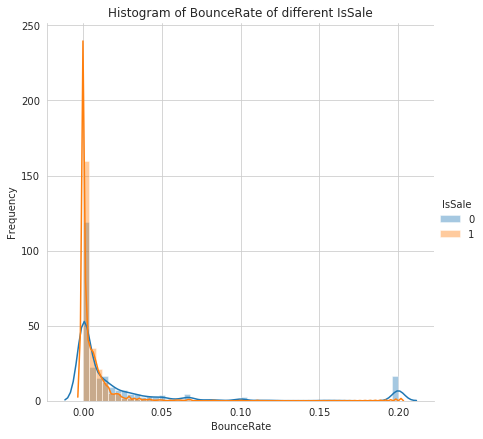

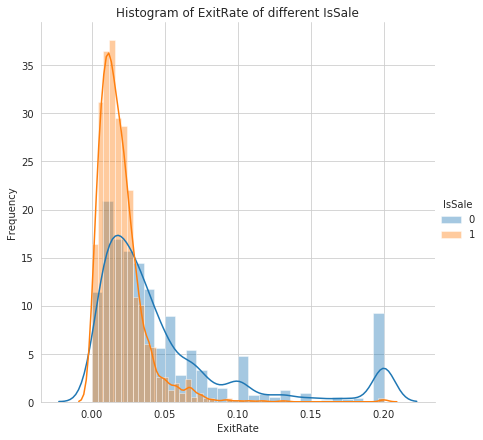

In [55]:
EDA.hist_plot()

<div class="alert alert-block alert-success"><b>Hist Plot Analysis:</b> 


<br/>

a) Blog time - Clearly the lower the blog time -> lower the sales conversion <br/>
b) Bounce rate - Clearly the lower the bounce rate -> Higher the sales conversion <br/>
c) News time - High overlap between the classes. hard to see whether news time convert to sales  <br/>
d) Social Media time - Less Social media time. Less conversion.   <br/>
</div>

### Mean and Std-dev

In [63]:
x= EDA.Statistics_Mean_Std()

In [64]:
x.head()

,IsSale1_Mean,IsSale1_Stand_Dev,IsSale0_Mean,IsSale0_Stand_Dev
SocialMediaTime,120.954,204.277,70.274,162.978
NewsTime,63.188,181.730,23.209,93.996
BlogsTime,1904.526,2329.157,991.576,1547.293
BounceRate,0.005,0.012,0.026,0.052
ExitRate,0.019,0.016,0.048,0.051


### Median, Percentile, Quantile, IQR, MAD

In [68]:
z= EDA.Statistics_Median_Percentile_Quantile_IQR_MAD()

In [69]:
z

,IsSale1_Median,IsSale1_0_Quantile,IsSale1_25_Quantile,IsSale1_50_Quantile,IsSale1_75_Quantile,IsSale1_90_Percentile,IsSale1_MAD,IsSale0_Median,IsSale0_0_Quantile,IsSale0_25_Quantile,IsSale0_50_Quantile,IsSale0_75_Quantile,IsSale0_90_Percentile,IsSale0_MAD
SocialMediaTime,51.854,0.000,0.000,51.854,155.223,309.0633000000001,76.879,0.0,0.000,0.000,0.000,82.195,198.75,0.000
NewsTime,0.0,0.000,0.000,0.000,26.000,191.7414000000002,0.000,0.0,0.000,0.000,0.000,0.000,41.0,0.000
BlogsTime,1123.1375,0.000,543.021,1123.138,2287.674,4714.676900000001,1056.390,474.833,0.000,138.716,474.833,1271.845,2461.25,607.619
BounceRate,0.0,0.000,0.000,0.000,0.006,0.013999999999999999,0.000,0.005,0.000,0.000,0.005,0.021,0.067,0.007
ExitRate,0.016,0.000,0.009,0.016,0.025,0.037000000000000005,0.012,0.031,0.000,0.016,0.031,0.057,0.11699999999999999,0.027


## Visualization Categorical variables <a id='Part_A311'></a>

### Explore the sales conversion Channel and platform in each region

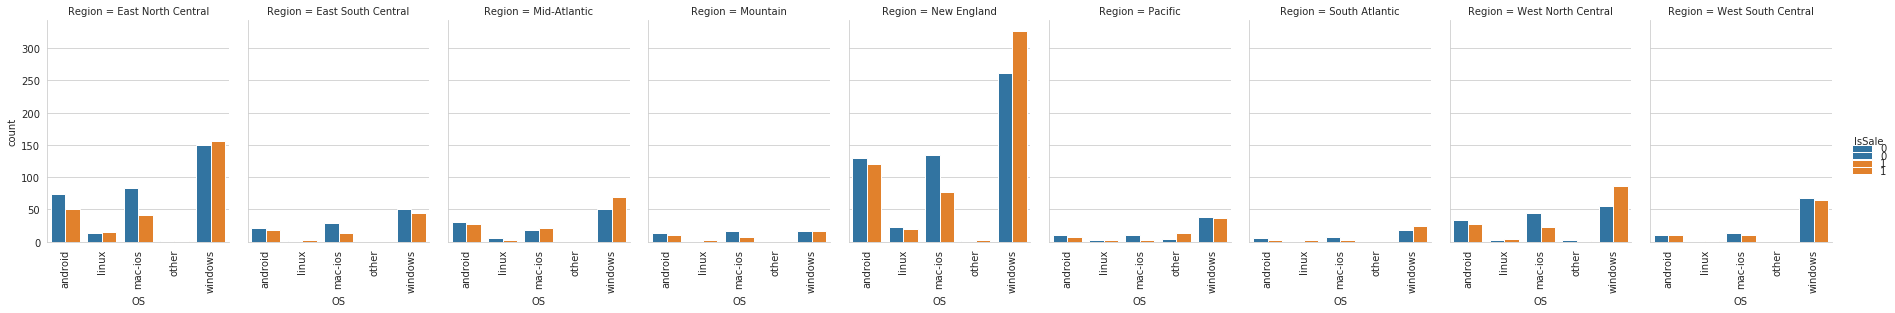

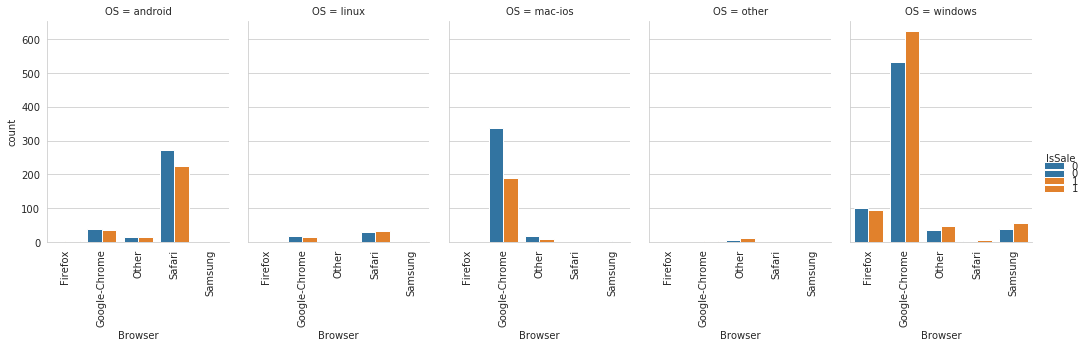

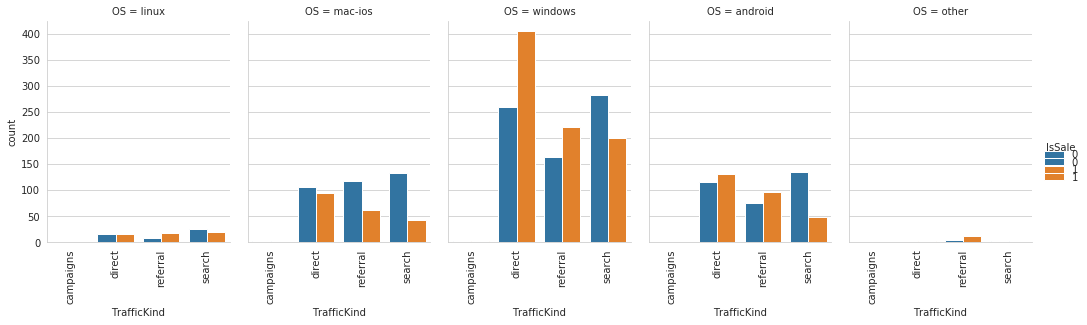

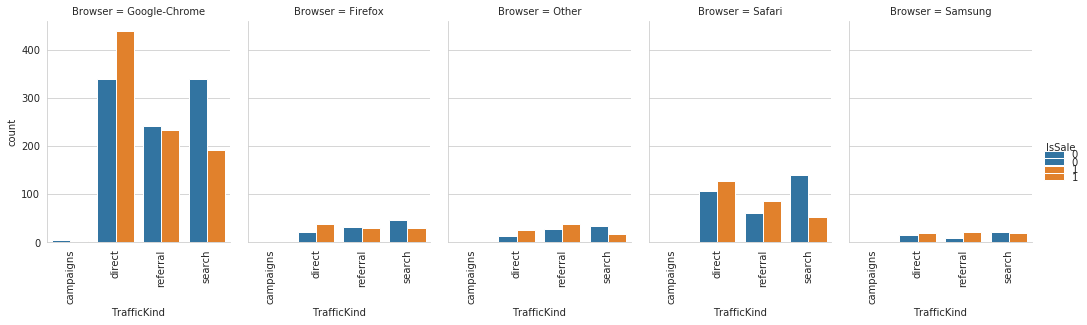

In [84]:
Sales_conversion_channel = ['TrafficKind', 'OS', 'Browser', 'Region', 'IsSale']


res1=train_data.groupby(['OS', 'IsSale', 'Region'],as_index=False).size()

res1=pd.DataFrame(res1)
res1.reset_index(inplace=True)
res1.rename({0:'count'},axis='columns',inplace=True)


g = sns.catplot(x="OS", y="count",
                hue="IsSale", col="Region",
                 data=res1, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)

res2=train_data.groupby([ 'OS', 'Browser',  'IsSale'],as_index=False).size()

res2=pd.DataFrame(res2)
res2.reset_index(inplace=True)
res2.rename({0:'count'},axis='columns',inplace=True)

g = sns.catplot(x="Browser", y="count",
                hue="IsSale", col="OS",
                 data=res2, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)


res3=train_data.groupby([ 'TrafficKind', 'OS',  'IsSale'],as_index=False).size()

res3=pd.DataFrame(res3)
res3.reset_index(inplace=True)
res3.rename({0:'count'},axis='columns',inplace=True)

g = sns.catplot(x="TrafficKind", y="count",
                hue="IsSale", col="OS",
                 data=res3, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)


res4=train_data.groupby([ 'TrafficKind',   'IsSale', 'Browser'],as_index=False).size()

res4=pd.DataFrame(res4)
res4.reset_index(inplace=True)
res4.rename({0:'count'},axis='columns',inplace=True)

g = sns.catplot(x= "TrafficKind", y="count",
                hue="IsSale", col=  "Browser",
                 data=res4, kind="bar",
                 height=4, aspect=.7);
g.add_legend()
g.set_xticklabels(rotation=90)

<div class="alert alert-block alert-success"><b>Sales conversion Channel Analysis:</b> 


<br/>
 <b>Region:</b> 

a) East North Central Region - Mac ios has lower conversion <br/>
b) Mid Atlantic- Windows has higher conversion <br/>
    
<b>OS:</b> <br/>
a) Windows - Google Chrome has higher conversion;whereas,Lower sales conversion on Android and Mac-ios <br/>
b) Windows - Direct channel has higher sales conversion  <br/>
    
<b>Browser:</b> <br/>
a) Google Chrome - Direct Channel has higher conversion;whereas,Lower sales conversion with Search <br/>
   
    

</div>

<Figure size 432x288 with 0 Axes>

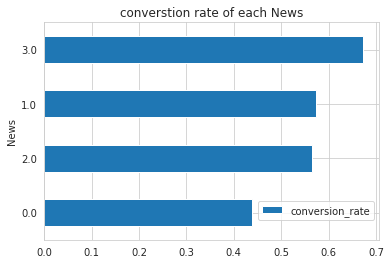

<Figure size 432x288 with 0 Axes>

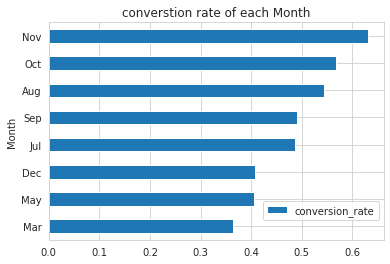

<Figure size 432x288 with 0 Axes>

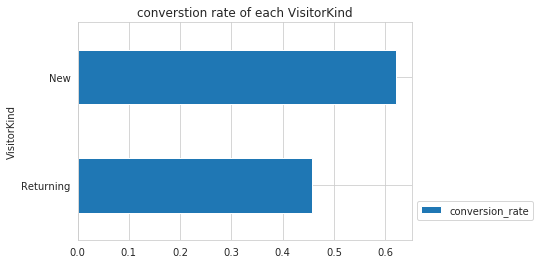

<Figure size 432x288 with 0 Axes>

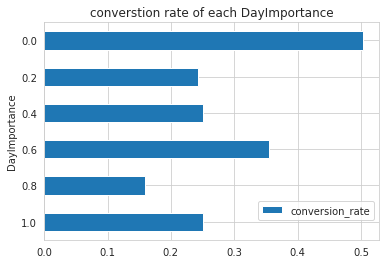

<Figure size 432x288 with 0 Axes>

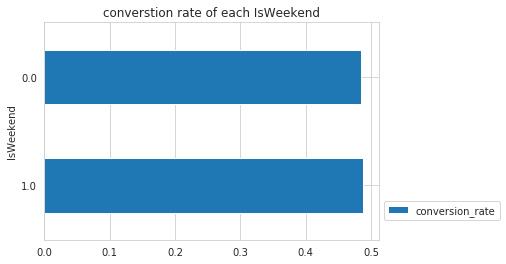

In [87]:
# function to plot the converstion rate against each level of a categorical variable
# if there are too many levels of the variable, only plot the levels with a frequency higher than the cutoff
def conversion_rate_per_category(data,variable,cutoff,sort=True):
    count=data.groupby([variable]).size()
    keys=count[count>cutoff].index.tolist()
    res=data[data[variable].isin(keys)].groupby([variable]).apply(lambda x: x['IsSale'].sum()/len(x))
    res=pd.DataFrame(res)
    res.reset_index(inplace=True)
    res.rename({0:'conversion_rate'},axis='columns',inplace=True)
    plt.figure()
    if sort:
        res.sort_values(by=['conversion_rate']).plot(kind='barh',
                        x=variable,y="conversion_rate",title='converstion rate of each '+variable)
    else:
        res.sort_values(by=variable,ascending=False).plot(kind='barh',
                        x=variable,y="conversion_rate",title='converstion rate of each '+variable)
    plt.legend(bbox_to_anchor=(1, 0.2))
conversion_rate_per_category(train_data,'News',100)
conversion_rate_per_category(train_data,'Month',100)
conversion_rate_per_category(train_data,'VisitorKind',100,False)
conversion_rate_per_category(train_data,'DayImportance',10,False)
conversion_rate_per_category(train_data,'IsWeekend',0,False)

<div class="alert alert-block alert-success"><b>Conversion rate categorical varaible:</b> 


<br/>
 

a) News marked "3" has higher conversion rate <br/>
b) Nov Month has highest conversion followed by Oct and August <br/>
      --Should check the seasonality and events (Thanksgiving, Blackfriday, Back to school etc..) <br/>
c) New Users has higher conversion rate <br/>
d) Day 0 has higher importance and conversion rate <br/>
      --Should see if there are higher promotions run on that day by marketing
    

   
    

</div>

#### 1. Data preprocessing <a id='Part_B1'></a>

In [90]:
train_data.columns

Index(['SocialMedia', 'SocialMediaTime', 'News', 'NewsTime', 'Blogs',
       'BlogsTime', 'BounceRate', 'ExitRate', 'PageValue', 'TrafficKind', 'OS',
       'Browser', 'Month', 'Region', 'VisitorKind', 'DayImportance',
       'IsWeekend', 'IsSale'],
      dtype='object')

In [99]:
#Split test train set
from sklearn.model_selection import train_test_split

Features = ['SocialMedia', 'SocialMediaTime', 'News', 'NewsTime', 'Blogs',
       'BlogsTime', 'BounceRate', 'ExitRate', 'PageValue', 'TrafficKind', 'OS',
       'Browser', 'Month', 'Region', 'VisitorKind', 'DayImportance',
       'IsWeekend']

target = ['IsSale']

df_feature = train_data[Features]
df_target = train_data [target]
    

X_train, X_test, y_train, y_test = train_test_split(
    df_feature,df_target, test_size=0.2, random_state=42)

### One hot encoding of categorical values

In [103]:
categorical_features = ['TrafficKind',        
'OS',
'Browser',
'Month',
'Region',
'VisitorKind',
'DayImportance',
'IsWeekend']

In [107]:
Numerical_features = ['SocialMedia',
'SocialMediaTime',
'News',
'NewsTime',
'Blogs',
'BlogsTime',
'BounceRate',
'ExitRate',
'PageValue']

In [104]:
df2 = pd.get_dummies(data=train_data, columns=categorical_features)
df2.columns

Index(['SocialMedia', 'SocialMediaTime', 'News', 'NewsTime', 'Blogs',
       'BlogsTime', 'BounceRate', 'ExitRate', 'PageValue', 'IsSale',
       'TrafficKind_campaigns', 'TrafficKind_direct', 'TrafficKind_referral',
       'TrafficKind_search', 'OS_android', 'OS_linux', 'OS_mac-ios',
       'OS_other', 'OS_windows', 'Browser_Firefox', 'Browser_Google-Chrome',
       'Browser_Other', 'Browser_Safari', 'Browser_Samsung', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Region_East North Central', 'Region_East South Central',
       'Region_Mid-Atlantic', 'Region_Mountain', 'Region_New England',
       'Region_Pacific', 'Region_South Atlantic', 'Region_West North Central',
       'Region_West South Central', 'VisitorKind_New', 'VisitorKind_Other',
       'VisitorKind_Returning', 'DayImportance_0.0', 'DayImportance_0.2',
       'DayImportance_0.4', 'DayImportance_0.6', 'DayImportance_0.

In [105]:
df2.sample(5)

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,IsSale,TrafficKind_campaigns,TrafficKind_direct,TrafficKind_referral,TrafficKind_search,OS_android,OS_linux,OS_mac-ios,OS_other,OS_windows,Browser_Firefox,Browser_Google-Chrome,Browser_Other,Browser_Safari,Browser_Samsung,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Region_East North Central,Region_East South Central,Region_Mid-Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,VisitorKind_New,VisitorKind_Other,VisitorKind_Returning,DayImportance_0.0,DayImportance_0.2,DayImportance_0.4,DayImportance_0.6,DayImportance_0.8,DayImportance_1.0,IsWeekend_0.0,IsWeekend_1.0
UniqueId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0x1e20,0.000,0.000,0.000,0.000,5.000,131.833,0.000,0.013,36.138,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
0x1a06,0.000,0.000,0.000,0.000,40.000,589.500,0.018,0.034,0.000,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
0x2106,9.000,328.750,0.000,0.000,108.000,2793.733,0.002,0.019,0.000,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
00x744,5.000,141.000,0.000,0.000,33.000,1371.633,0.000,0.006,44.711,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
0x207d,1.000,0.000,0.000,0.000,65.000,732.092,0.006,0.020,2.734,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[Numerical_features] = scaler.fit_transform(train_data[Numerical_features])

In [110]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

SocialMedia: [0.35135135 0.54054054 0.37837838 0.27027027 0.2972973  0.7027027
 0.32432432 0.45945946 0.64864865 0.43243243 0.72972973 0.48648649
 0.56756757 0.40540541 0.51351351 0.67567568 0.62162162 0.59459459
 0.81081081 0.86486486 0.75675676 0.97297297 0.78378378 0.
 1.        ]
SocialMediaTime: [0.03228561 0.36966256 0.02242235 ... 0.07765117 0.11866679 0.13416651]
News: [0.         0.16666667 0.08333333 0.25       0.33333333 0.5
 1.         0.41666667 0.58333333 0.75       0.83333333 0.66666667]
NewsTime: [0.         0.07071468 0.03620591 0.00810843 0.00509146 0.03394304
 0.37016757 0.02206298 0.35583625 0.2541955  0.05826889 0.22854983
 0.14878368 0.04356024 0.02300603 0.19517251 0.01668866 0.23024699
 0.04582311 0.16858379 0.13325474 0.0096172  0.01470865 0.19036391
 0.00735433 0.21723549 0.13775219 0.20874972 0.03450876 0.0534603
 0.16971522 0.02376013 0.01357722 0.03111446 0.01584009 0.00396002
 0.07863472 0.47803121 0.01159721 0.0342259  0.18063357 0.052046
 0.16557643 0.34

In [119]:
X = df2.drop('IsSale',axis='columns')
y = df2['IsSale']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### 2. Built Models <a id='Part_B2'></a>

In [120]:
# baseline model - decision tree
# decisiton tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

# training set performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = tree.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))

traing auc score: 0.7809713312230475
testing auc score: 0.7921106996195802


In [123]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400,max_features="auto")
rf.fit(X_train, y_train)

# training set performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = rf.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))

traing auc score: 0.9218963757808151
testing auc score: 0.8528077998639559


In [122]:
# adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(n_estimators=500)
adab.fit(X_train, y_train)

# training set performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(adab, X_train, y_train,
                         scoring="roc_auc", cv=10)
print('traing auc score:', scores.mean())

# testing set performance
y_pred = adab.predict(X_test)
print('testing auc score:', roc_auc_score(y_test,y_pred))

traing auc score: 0.9005221739317848
testing auc score: 0.8475990728843877


#### 3. Parameter Tuning <a id='Part_B3'></a>

The random forest model leads the best testing auc score. Use Grid-Search for further prameter tuning.

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [300, 400], 
               'max_features': [12,14,16]}]

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=10,
                           scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train, y_train)
print("best parameter based on the toy grid search:",grid_search.best_params_)

best parameter based on the toy grid search: {'max_features': 16, 'n_estimators': 400}


In [130]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

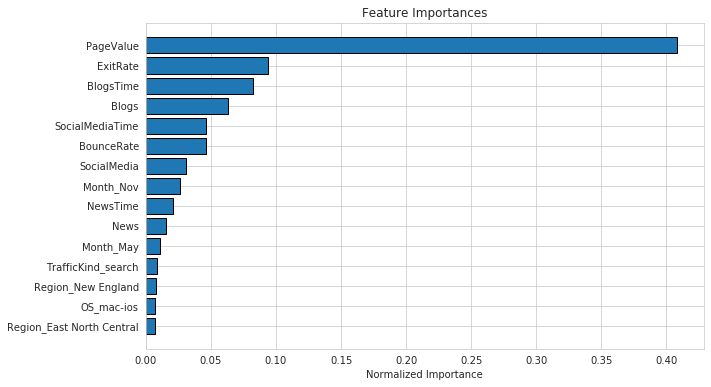

,index,feature,importance,importance_normalized
0,8,PageValue,0.408,0.408
1,7,ExitRate,0.094,0.094
2,5,BlogsTime,0.083,0.083
3,4,Blogs,0.063,0.063
4,1,SocialMediaTime,0.046,0.046
5,6,BounceRate,0.046,0.046
6,0,SocialMedia,0.031,0.031
7,30,Month_Nov,0.026,0.026
8,3,NewsTime,0.021,0.021
9,2,News,0.016,0.016


In [131]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

plot_feature_importances(feature_importances_df)

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       303
           1       0.86      0.82      0.84       262

    accuracy                           0.85       565
   macro avg       0.86      0.85      0.85       565
weighted avg       0.85      0.85      0.85       565



# Part C  <a id='Part_C'></a>

Based on model result above, we might be able to leverage the following key takeaway:

The most three importance features are: 
   - Page value
   - Exit Rate
   - Blog Time

# Part D  <a id='Part_D'></a>

In [136]:
out_of_sample_data = pd.read_csv("test.csv", index_col=0)

In [137]:
out_of_sample_data.head()

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend
UniqueId,,,,,,,,,,,,,,,,,
0x1de1,5.000,277.800,0.000,0.000,25.000,884.500,0.000,0.004,7.481,direct,windows,Other,Jul,Mid-Atlantic,New,0.000,1.000
0x21eb,7.000,190.438,0.000,0.000,60.000,1967.780,0.004,0.015,2.627,referral,mac-ios,Google-Chrome,Dec,Mountain,Returning,0.000,1.000
0x2f6a,0.000,0.000,0.000,0.000,5.000,586.000,0.000,0.060,0.000,referral,windows,Firefox,Nov,Pacific,Returning,0.000,1.000
0x25f0,2.000,88.000,10.000,719.000,54.000,1986.553,0.005,0.020,25.827,direct,android,Safari,Dec,Mid-Atlantic,Returning,0.000,0.000
0x2be0,12.000,1276.264,0.000,0.000,118.000,3215.173,0.000,0.005,22.458,search,mac-ios,Google-Chrome,Nov,Mountain,Returning,0.000,0.000


In [139]:
out_of_sample_data = out_of_sample_data.dropna()

In [148]:
df2_out_of_sample = pd.get_dummies(data=out_of_sample_data, columns=categorical_features)
df2_out_of_sample.columns
df2_out_of_sample[Numerical_features] = scaler.fit_transform(out_of_sample_data[Numerical_features])
IsSale = grid_search.predict_proba(df2_out_of_sample)

In [157]:
IsSale[1][1]

0.5975

In [159]:
Empty_list = []

In [160]:
for i in range (len(IsSale)):
    if IsSale [i][0] >= IsSale [i][1]:
        Empty_list.append(IsSale [i][0])
    else:
        Empty_list.append(IsSale [i][1])
        
        
    

In [162]:
out_of_sample_data['IsSale'] = Empty_list

In [163]:
out_of_sample_data

,SocialMedia,SocialMediaTime,News,NewsTime,Blogs,BlogsTime,BounceRate,ExitRate,PageValue,TrafficKind,OS,Browser,Month,Region,VisitorKind,DayImportance,IsWeekend,IsSale
UniqueId,,,,,,,,,,,,,,,,,,
0x1de1,5.000,277.800,0.000,0.000,25.000,884.500,0.000,0.004,7.481,direct,windows,Other,Jul,Mid-Atlantic,New,0.000,1.000,0.943
0x21eb,7.000,190.438,0.000,0.000,60.000,1967.780,0.004,0.015,2.627,referral,mac-ios,Google-Chrome,Dec,Mountain,Returning,0.000,1.000,0.598
0x2f6a,0.000,0.000,0.000,0.000,5.000,586.000,0.000,0.060,0.000,referral,windows,Firefox,Nov,Pacific,Returning,0.000,1.000,0.757
0x25f0,2.000,88.000,10.000,719.000,54.000,1986.553,0.005,0.020,25.827,direct,android,Safari,Dec,Mid-Atlantic,Returning,0.000,0.000,0.770
0x2be0,12.000,1276.264,0.000,0.000,118.000,3215.173,0.000,0.005,22.458,search,mac-ios,Google-Chrome,Nov,Mountain,Returning,0.000,0.000,0.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x123c,1.000,54.000,0.000,0.000,31.000,2543.500,0.000,0.007,0.000,direct,windows,Google-Chrome,May,South Atlantic,Returning,0.000,0.000,0.940
00x5e8,6.000,408.200,0.000,0.000,33.000,878.624,0.000,0.020,19.365,direct,windows,Google-Chrome,Mar,New England,Returning,0.000,0.000,0.920
0x19b7,6.000,189.800,0.000,0.000,9.000,208.833,0.000,0.015,70.316,direct,windows,Google-Chrome,Nov,East North Central,New,0.000,0.000,0.950


In [164]:
Sample_submission = out_of_sample_data['IsSale']

In [165]:
Sample_submission.head()

UniqueId
0x1de1   0.943
0x21eb   0.598
0x2f6a   0.757
0x25f0   0.770
0x2be0   0.818
Name: IsSale, dtype: float64

# Part E  <a id='Part_E'></a>

<div class="alert alert-block alert-success"><b>Process Improvement:</b> 
<br/>

a) Create Pipelines to remove redudancy in the coding<br/>
b) Use SHAP instead of Feature importance to see the positive and negative variance <br/>
c) Further tune the RF model and deep dive into the train and test accuracy of the best parameters <br/>
d) Use Feature Engg to create more features and see if we can further improve the model accuracy <br/>
e) Explore other Models like Xgboost and NN 
</div>

Index(['IsSale'], dtype='object')

# Visualization, Modeling, Machine Learning

Build a model that can predict the probability that a visit can be converted to a transaction and identify how different features influence the decision. Please explain the findings for technical and non-technical audiences using comments and visualizations, if appropriate. Do comment on any actions taken or why a model was choosen over another.
- **Build an optimized model that effectively solves the business problem**
- **The model will be evaluated on the basis of roc_auc_score**
- **Read the test.csv file and prepare features for testing**


# Possible Improvements

If you had more time to improve your model, what steps would you take?

- **Submit the predictions on the test dataset using your optimized model**

    For each record in the test set (`test.csv`), predict the probability of the `IsSale` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **UniqueId**
   - **IsSale**

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)